In [1]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt



import statsmodels.api as sm
import statsmodels.tsa.api as smt

from timeit import default_timer as timer

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


Vamos a realizar una comparacion entre el barcelona y el bayern

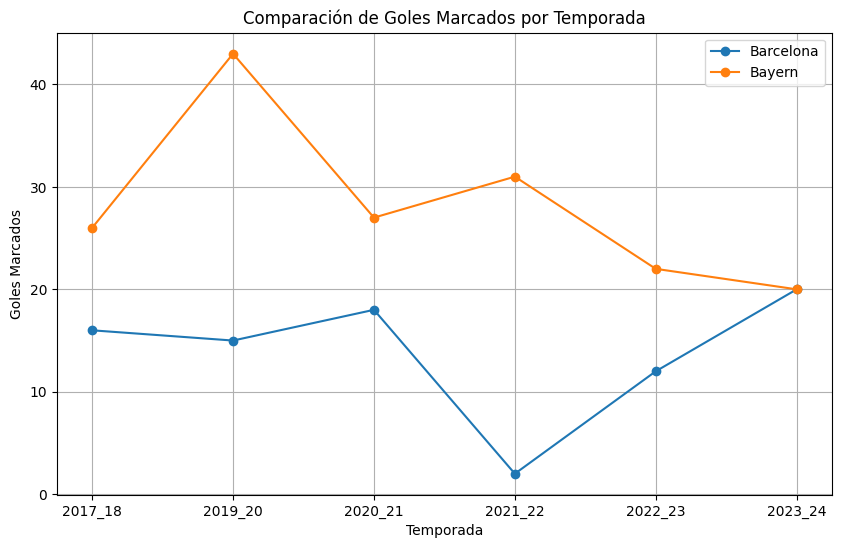

In [9]:

# Leer el DataFrame con las estadísticas del Barcelona
estadisticas_barcelona = pd.read_csv("STATS/estadisticas_barcelona.csv")
# Establecer el índice
estadisticas_barcelona.set_index('Temporada Barcelona', inplace=True)

# Leer el DataFrame con las estadísticas del Bayern
estadisticas_bayern = pd.read_csv("STATS/estadisticas_bayern.csv")
# Establecer el índice
estadisticas_bayern.set_index('Temporada Bayern', inplace=True)

# Visualizar los datos de goles marcados por temporada para ambos equipos
plt.figure(figsize=(10, 6))
plt.plot(estadisticas_barcelona.index, estadisticas_barcelona['Goles Marcados Barcelona'], marker='o', label='Barcelona')
plt.plot(estadisticas_bayern.index, estadisticas_bayern['Goles Marcados Bayern'], marker='o', label='Bayern')
plt.title('Comparación de Goles Marcados por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Goles Marcados')
plt.legend()
plt.grid(True)
plt.show()


El bayern es muy superior

c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observation

Error cuadrático medio para el Barcelona: 61.462429749783695


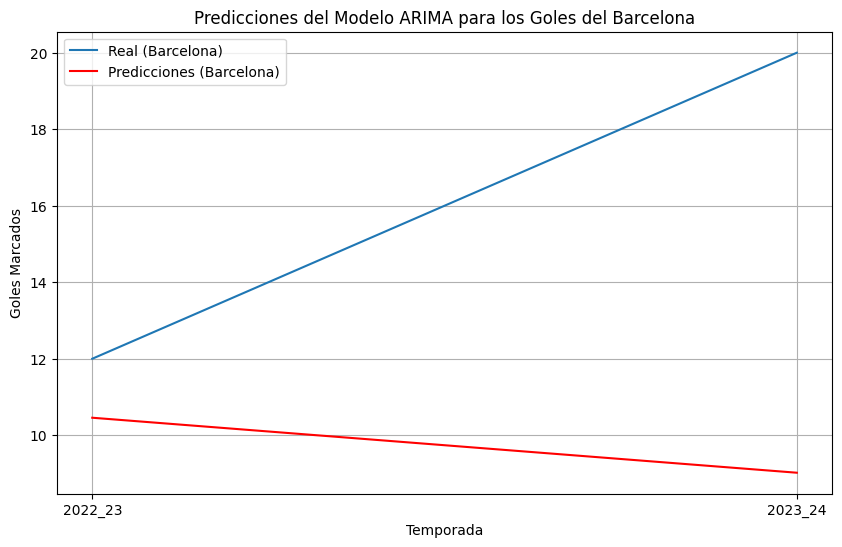

c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Error cuadrático medio para el Bayern: 70.4739799469204


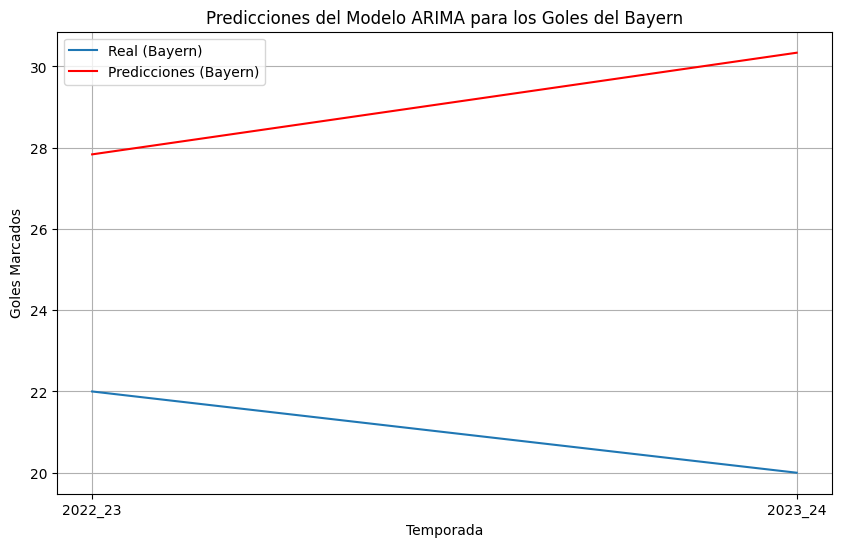

In [8]:
# Definir el tamaño del conjunto de entrenamiento para el Barcelona
train_size_barcelona = int(len(estadisticas_barcelona) * 0.7)

# Dividir los datos en entrenamiento y prueba para el Barcelona
train_barcelona = estadisticas_barcelona.iloc[:train_size_barcelona]
test_barcelona = estadisticas_barcelona.iloc[train_size_barcelona:]

# Ajustar un modelo ARIMA para el Barcelona
model_barcelona = ARIMA(train_barcelona['Goles Marcados Barcelona'], order=(5,1,1))
model_fit_barcelona = model_barcelona.fit()

# Hacer predicciones en el conjunto de prueba para el Barcelona
predictions_barcelona = model_fit_barcelona.forecast(steps=len(test_barcelona))

# Calcular el error cuadrático medio para el Barcelona
mse_barcelona = mean_squared_error(test_barcelona['Goles Marcados Barcelona'], predictions_barcelona)
print('Error cuadrático medio para el Barcelona:', mse_barcelona)

# Visualizar las predicciones para el Barcelona
plt.figure(figsize=(10, 6))
plt.plot(test_barcelona.index, test_barcelona['Goles Marcados Barcelona'], label='Real (Barcelona)')
plt.plot(test_barcelona.index, predictions_barcelona, color='red', label='Predicciones (Barcelona)')
plt.title('Predicciones del Modelo ARIMA para los Goles del Barcelona')
plt.xlabel('Temporada')
plt.ylabel('Goles Marcados')
plt.legend()
plt.grid(True)
plt.show()

# Definir el tamaño del conjunto de entrenamiento para el Bayern
train_size_bayern = int(len(estadisticas_bayern) * 0.8)

# Dividir los datos en entrenamiento y prueba para el Bayern
train_bayern = estadisticas_bayern.iloc[:train_size_bayern]
test_bayern = estadisticas_bayern.iloc[train_size_bayern:]

# Ajustar un modelo ARIMA para el Bayern
model_bayern = ARIMA(train_bayern['Goles Marcados Bayern'], order=(1,1,0))
model_fit_bayern = model_bayern.fit()

# Hacer predicciones en el conjunto de prueba para el Bayern
predictions_bayern = model_fit_bayern.forecast(steps=len(test_bayern))

# Calcular el error cuadrático medio para el Bayern
mse_bayern = mean_squared_error(test_bayern['Goles Marcados Bayern'], predictions_bayern)
print('Error cuadrático medio para el Bayern:', mse_bayern)

# Visualizar las predicciones para el Bayern
plt.figure(figsize=(10, 6))
plt.plot(test_bayern.index, test_bayern['Goles Marcados Bayern'], label='Real (Bayern)')
plt.plot(test_bayern.index, predictions_bayern, color='red', label='Predicciones (Bayern)')
plt.title('Predicciones del Modelo ARIMA para los Goles del Bayern')
plt.xlabel('Temporada')
plt.ylabel('Goles Marcados')
plt.legend()
plt.grid(True)
plt.show()


c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observation

c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\usuario\AppData\Local\P

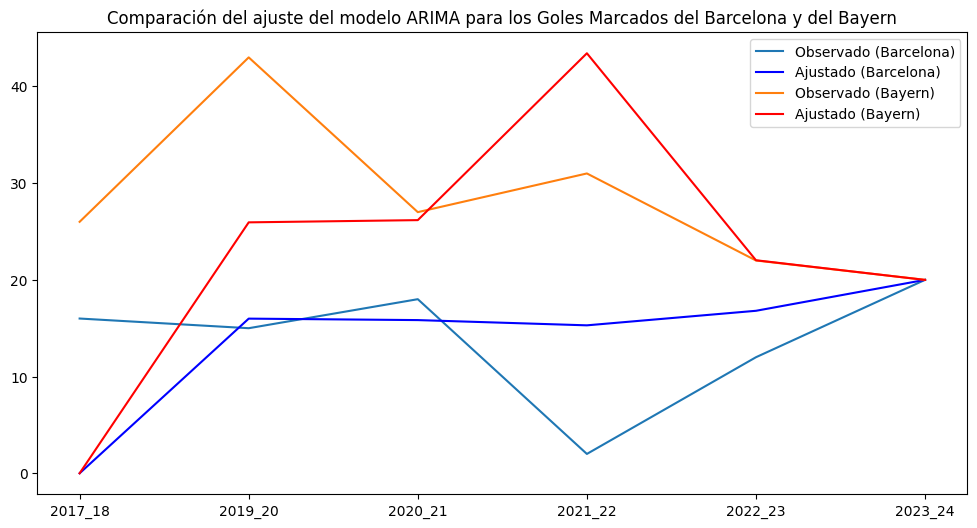

In [9]:
# Ajuste del modelo ARIMA para los goles del Barcelona
data_barcelona = estadisticas_barcelona['Goles Marcados Barcelona']
order_barcelona = (5, 1, 1)
model_barcelona = ARIMA(data_barcelona, order=order_barcelona)
fitted_model_barcelona = model_barcelona.fit()

# Ajuste del modelo ARIMA para los goles del Bayern
data_bayern = estadisticas_bayern['Goles Marcados Bayern']
order_bayern = (5, 1, 1)
model_bayern = ARIMA(data_bayern, order=order_bayern)
fitted_model_bayern = model_bayern.fit()

# Visualización de los resultados
plt.figure(figsize=(12, 6))
plt.plot(data_barcelona, label='Observado (Barcelona)')
plt.plot(fitted_model_barcelona.fittedvalues, color='blue', label='Ajustado (Barcelona)')
plt.plot(data_bayern, label='Observado (Bayern)')
plt.plot(fitted_model_bayern.fittedvalues, color='red', label='Ajustado (Bayern)')
plt.title('Comparación del ajuste del modelo ARIMA para los Goles Marcados del Barcelona y del Bayern')
plt.legend()
plt.show()


Observamos como el modelo ajustado del Bayern es mejor que el del barcelona

También hemos observado en los analisis de cada equipo, como obviamente, los modelos predicen mas goles para la proxima temporada para el bayern que el barsa y tambien, que alcanzará una fase mas cerca de la final

In [10]:
#ARIMA
# Hacer predicciones para la próxima temporada
next_season_prediction = model_fit_barcelona.forecast(steps=2)
print('Predicción de goles para el barsa para las próximas temporadas:', next_season_prediction.round())

# Calcular la cantidad de partidos para la próxima temporada (asumiendo un promedio histórico)
average_matches_per_season = estadisticas_barcelona['Partidos Jugados Barcelona'].mean()
next_season_matches = round(average_matches_per_season)
print('Número estimado de partidos para la próxima temporada:', next_season_matches)

# Hacer predicciones para la próxima temporada
next_season_prediction = model_fit_bayern.forecast(steps=2)
print('Predicción de goles del bayern para las próximas temporadas:', next_season_prediction.round())

# Calcular la cantidad de partidos para la próxima temporada (asumiendo un promedio histórico)
average_matches_per_season = estadisticas_bayern['Partidos Jugados Bayern'].mean()
next_season_matches = round(average_matches_per_season)
print('Número estimado de partidos para la próxima temporada:', next_season_matches)

Predicción de goles para el barsa para las próximas temporadas: 4    10.0
5     9.0
Name: predicted_mean, dtype: float64
Número estimado de partidos para la próxima temporada: 8
Predicción de goles del bayern para las próximas temporadas: 4    28.0
5    30.0
Name: predicted_mean, dtype: float64
Número estimado de partidos para la próxima temporada: 11


c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Por último vamos a comparar los modelos con los que hemos obtenido un error mas bajo en ambos equipos

Error cuadrático medio para Barcelona: 24.458900000000003
Error cuadrático medio para Bayern: 190.988011111111


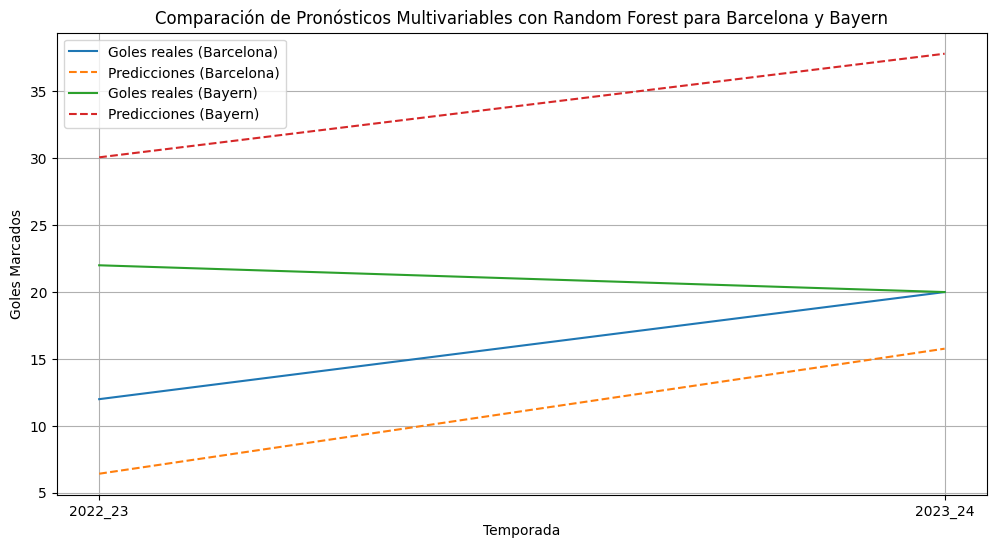

In [11]:
# Importar librerías necesarias
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Definir el tamaño del conjunto de entrenamiento
train_size = int(len(estadisticas_barcelona) * 0.8)

# Dividir los datos en entrenamiento y prueba para Barcelona
train_barcelona, test_barcelona = estadisticas_barcelona.iloc[:train_size], estadisticas_barcelona.iloc[train_size:]

# Dividir los datos en entrenamiento y prueba para Bayern
train_bayern, test_bayern = estadisticas_bayern.iloc[:train_size], estadisticas_bayern.iloc[train_size:]

# Definir las características (X) y las etiquetas (y) para Barcelona
X_train_barcelona, y_train_barcelona = train_barcelona.drop('Goles Marcados Barcelona', axis=1), train_barcelona['Goles Marcados Barcelona']
X_test_barcelona, y_test_barcelona = test_barcelona.drop('Goles Marcados Barcelona', axis=1), test_barcelona['Goles Marcados Barcelona']

# Definir las características (X) y las etiquetas (y) para Bayern
X_train_bayern, y_train_bayern = train_bayern.drop('Goles Marcados Bayern', axis=1), train_bayern['Goles Marcados Bayern']
X_test_bayern, y_test_bayern = test_bayern.drop('Goles Marcados Bayern', axis=1), test_bayern['Goles Marcados Bayern']

# Inicializar y ajustar el modelo Random Forest para Barcelona
model_barcelona = RandomForestRegressor(n_estimators=100, random_state=42)
model_barcelona.fit(X_train_barcelona, y_train_barcelona)

# Realizar predicciones para el conjunto de prueba del Barcelona
predictions_barcelona = model_barcelona.predict(X_test_barcelona)

# Calcular el error cuadrático medio para Barcelona
mse_barcelona = mean_squared_error(y_test_barcelona, predictions_barcelona)
print('Error cuadrático medio para Barcelona:', mse_barcelona)

# Inicializar y ajustar el modelo Random Forest para Bayern
model_bayern = RandomForestRegressor(n_estimators=100, random_state=42)
model_bayern.fit(X_train_bayern, y_train_bayern)

# Realizar predicciones para el conjunto de prueba del Bayern
predictions_bayern = model_bayern.predict(X_test_bayern)

# Calcular el error cuadrático medio para Bayern
mse_bayern = mean_squared_error(y_test_bayern, predictions_bayern)
print('Error cuadrático medio para Bayern:', mse_bayern)

# Visualizar los resultados
plt.figure(figsize=(12, 6))

# Gráfico para los goles del Barcelona
plt.plot(test_barcelona.index, test_barcelona['Goles Marcados Barcelona'], label='Goles reales (Barcelona)')
plt.plot(test_barcelona.index, predictions_barcelona, label='Predicciones (Barcelona)', linestyle='dashed')

# Gráfico para los goles del Bayern
plt.plot(test_bayern.index, test_bayern['Goles Marcados Bayern'], label='Goles reales (Bayern)')
plt.plot(test_bayern.index, predictions_bayern, label='Predicciones (Bayern)', linestyle='dashed')

plt.legend()
plt.xlabel('Temporada')
plt.ylabel('Goles Marcados')
plt.title('Comparación de Pronósticos Multivariables con Random Forest para Barcelona y Bayern')
plt.grid(True)
plt.show()


Como vimos en los analisis detallados de cada equipo, el error del Bayern es demasiado grande como para sacar nada en claro de esta gráfica

Error cuadrático medio para Barcelona: 1.9804999999999993
Error cuadrático medio para Bayern: 0.17584999999999995


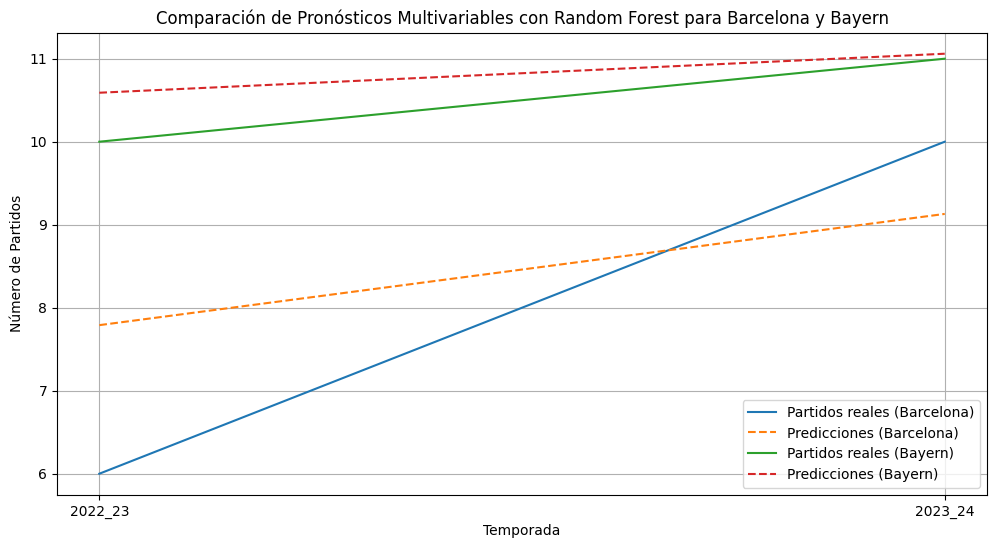

In [12]:
# Comparación de los pronósticos multivariables con Random Forest para Barcelona y Bayern

from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Pronóstico multivariable para Goles del Barcelona
features_barcelona = ['Goles Marcados Barcelona', 'Partidos Jugados Barcelona']
X_train_barcelona, y_train_barcelona = train_barcelona[features_barcelona], train_barcelona['Partidos Jugados Barcelona']
X_test_barcelona, y_test_barcelona = test_barcelona[features_barcelona], test_barcelona['Partidos Jugados Barcelona']

model_barcelona = RandomForestRegressor(n_estimators=100, random_state=42)
model_barcelona.fit(X_train_barcelona, y_train_barcelona)
predictions_barcelona = model_barcelona.predict(X_test_barcelona)
mse_barcelona = mean_squared_error(y_test_barcelona, predictions_barcelona)
print('Error cuadrático medio para Barcelona:', mse_barcelona)

# Pronóstico multivariable para Goles del Bayern
features_bayern = ['Goles Marcados Bayern', 'Partidos Jugados Bayern']
X_train_bayern, y_train_bayern = train_bayern[features_bayern], train_bayern['Partidos Jugados Bayern']
X_test_bayern, y_test_bayern = test_bayern[features_bayern], test_bayern['Partidos Jugados Bayern']

model_bayern = RandomForestRegressor(n_estimators=100, random_state=42)
model_bayern.fit(X_train_bayern, y_train_bayern)
predictions_bayern = model_bayern.predict(X_test_bayern)
mse_bayern = mean_squared_error(y_test_bayern, predictions_bayern)
print('Error cuadrático medio para Bayern:', mse_bayern)

# Visualización de los resultados
plt.figure(figsize=(12, 6))

# Gráfico para los partidos del Barcelona
plt.plot(test_barcelona.index, test_barcelona['Partidos Jugados Barcelona'], label='Partidos reales (Barcelona)')
plt.plot(test_barcelona.index, predictions_barcelona, label='Predicciones (Barcelona)', linestyle='dashed')

# Gráfico para los partidos del Bayern
plt.plot(test_bayern.index, test_bayern['Partidos Jugados Bayern'], label='Partidos reales (Bayern)')
plt.plot(test_bayern.index, predictions_bayern, label='Predicciones (Bayern)', linestyle='dashed')

plt.legend()
plt.xlabel('Temporada')
plt.ylabel('Número de Partidos')
plt.title('Comparación de Pronósticos Multivariables con Random Forest para Barcelona y Bayern')
plt.grid(True)
plt.show()


Sin embargo, aplicando pronósticos multivariables con random forest reducimos los errores a cifras insignificativas para los datos con los que trabajamos